# Replace var in multiple .docx

In [7]:
from datetime import datetime , timedelta
from docxtpl import DocxTemplate,InlineImage
from docx.shared import Inches

data_template_path= r'C:\Users\Panupong Jindarat\Documents\GitHub\automation\datasets\inviteTmpl.docx'

doc = DocxTemplate(data_template_path)

todayStr = datetime.today().strftime("%Y-%m-%d")
recipientName = ['Boat','Bank','Beat']
evntDtStr = (datetime.today() + timedelta(days=3)).strftime("%d-%b-%Y")
venueStr = 'Samyan'
senderName = 'Panupong_Depress'

for idx,value in enumerate(recipientName):
    context = {'todayStr': todayStr, 
                'recipientName': value, 
                'evntDtStr': evntDtStr, 
                'venueStr': venueStr,
                'senderName': senderName,
                'bannerImg' : InlineImage(doc, image_descriptor=r'C:\Users\Panupong Jindarat\Documents\GitHub\automation\datasets\party_banner_0.png', width=Inches(20), height=Inches(10))}

    doc.render(context) #เอา context ไปแปะในแต่ละ {{var}} ใน doc 

    exported_data_path = fr'C:\Users\Panupong Jindarat\Documents\GitHub\automation\result\invitation_{idx}.docx'

    doc.save(exported_data_path)

# Replace Loop var in one .docx

100%|██████████| 1/1 [00:09<00:00,  9.39s/it]


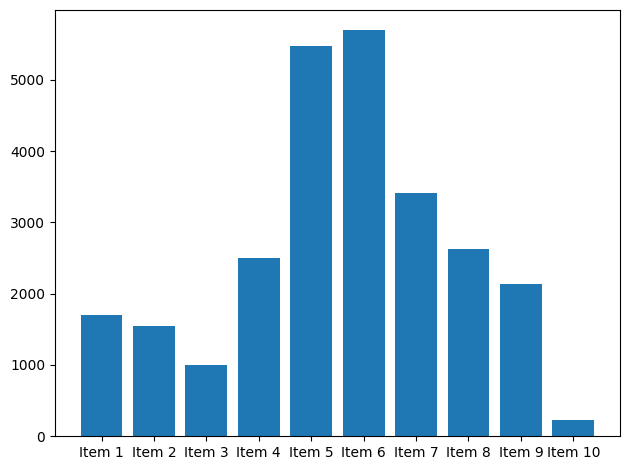

In [14]:
from datetime import datetime
import random
from docx2pdf import convert
import matplotlib.pyplot as plt
from docxtpl import DocxTemplate, InlineImage

# create a document object
data_template_path= r'C:\Users\Panupong Jindarat\Documents\GitHub\automation\datasets\reportTmpl.docx'

doc = DocxTemplate(data_template_path)

# create data for reports
salesTblRows = []
for k in range(10):
    costPu = random.randint(1, 15)
    nUnits = random.randint(100, 500)
    salesTblRows.append({"sNo": k+1, "name": "Item "+str(k+1),
                         "cPu": costPu, "nUnits": nUnits, "revenue": costPu*nUnits})

topItems = [x["name"] for x in sorted(salesTblRows, key=lambda x: x["revenue"], reverse=True)][0:3]

todayStr = datetime.now().strftime("%d-%b-%Y")

# create context to pass data to template
context = {
    "reportDtStr": todayStr,
    "salesTblRows": salesTblRows,
    "topItemsRows": topItems
}

image_path = r"C:\Users\Panupong Jindarat\Documents\GitHub\automation\result\trendImg.png"

# inject image into the context
fig, ax = plt.subplots()
ax.bar([x["name"] for x in salesTblRows], [x["revenue"] for x in salesTblRows])
fig.tight_layout()
fig.savefig(image_path)
context['trendImg'] = InlineImage(doc, image_path)

# render context into the document object
doc.render(context)

# save the document object as a word file
reportWordPath = fr'C:\Users\Panupong Jindarat\Documents\GitHub\automation\result\report_{todayStr}.docx'
doc.save(reportWordPath)

# convert the word file as pdf file
convert(reportWordPath, reportWordPath.replace(".docx", ".pdf")) # ถ้าไม่ทำแบบนี้ pdf เปิดไม่ได้

In [18]:
from docxtpl import DocxTemplate
import datetime as dt
from docx2pdf import convert
import random

customerObjects = [{
    "name": "Customer 1 Name",
    "addressList": [
        ["Address 1 Flat No.", "Address 1 Street", "Address 1 City, Pin code"],
        ["Address 2 Flat No.", "Address 2 Street", "Address 2 City, Pin code"],
    ]},
    {"name": "Customer 2 Name",
     "addressList": [
         ["Address 3 Flat No.", "Address 3 Street", "Address 3 City, Pin code"],
         ["Address 4 Flat No.", "Address 4 Street", "Address 4 City, Pin code"],
     ]}
]

# template word file path
tmplPath = r"C:\Users\Panupong Jindarat\Documents\GitHub\automation\datasets\customerTmpl.docx"

# run for each customer in a for loop
for cItr, cObj in enumerate(customerObjects):
    # get customer score
    cScore = random.randint(10, 90)
    # create report for each customer address in a for loop
    for addrItr in range(len(cObj["addressList"])):
        # create context dictionary
        context = {
            "todayStr": dt.datetime.now().strftime("%d-%b-%Y"),
            "recipientName": cObj['name'],
            "addressList": cObj['addressList'],
            "activeAddrInd": addrItr,
            "score": cScore
        }

        # create a document object
        doc = DocxTemplate(tmplPath)

        # render context into the document object
        doc.render(context)

        # save the document object as a word file
        resultFilePath = fr'C:\Users\Panupong Jindarat\Documents\GitHub\automation\result\report_{cItr}_{addrItr}.docx'
        doc.save(resultFilePath)

        # convert the word file into pdf
        pdfFilePath = resultFilePath.replace('.docx', '.pdf')
        convert(resultFilePath, pdfFilePath)

        # send the pdf file as email if required

print("execution complete...")

100%|██████████| 1/1 [00:08<00:00,  8.45s/it]

execution complete...


# Convert .docx -> .pdf

In [16]:
import docx2pdf

# start = r'C:\Users\Panupong Jindarat\Documents\GitHub\automation\result\report_19-Apr-2024.docx'
# end = r'C:\Users\Panupong Jindarat\Documents\GitHub\automation\word\report_19-Apr-2024.pdf'

start = r'C:\Users\Panupong Jindarat\Documents\GitHub\automation\result'
end = r'C:\Users\Panupong Jindarat\Documents\GitHub\automation\result_2'

# # convert "abcd.docx" file to pdf in the same folder
# docx2pdf.convert("abcd.docx")

# convert "abcd.docx" file to pdf with custom name and folder location
docx2pdf.convert(start, end)

# # convert all the docx files in a folder. 
# # Output files will also be in the same folder
# docx2pdf.convert("inp/")

# # convert all the docx files in a folder and keep the pdfs in another folder
# docx2pdf.convert("inp/", "out/")

100%|██████████| 14/14 [00:13<00:00,  1.07it/s]
